problem definition:

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

questions:

* what is the best/less selling products
* which products have the highest and lowest profit
* what is the sales trend over time
* which regions generate the highest/lowest sales
* which regions have the highest and lowest profit
* how is the performing in different regions compared to market potential
* high/low Revenue Categories
* categories profit
* which product are often purchased together
* which customers have the highest repeat purchase rates
* customer Feedback
* what discounts could be offered to boost sales of underperforming products and categories?

metadata:

* Row ID => Unique ID for each row.
*Order ID => Unique Order ID for each Customer.
*Order Date => Order Date of the product.
*Ship Date => Shipping Date of the Product.
*Ship Mode=> Shipping Mode specified by the Customer.
*Customer ID => Unique ID to identify each Customer.
*Customer Name => Name of the Customer.
*Segment => The segment where the Customer belongs.
*Country => Country of residence of the Customer.
*City => City of residence of of the Customer.
*State => State of residence of the Customer.
*Postal Code => Postal Code of every Customer.
*Region => Region where the Customer belong.
*Product ID => Unique ID of the Product.
*Category => Category of the product ordered.
*Sub-Category => Sub-Category of the product ordered.
*Product Name => Name of the Product
*Sales => Sales of the Product.
*Quantity => Quantity of the Product.
*Discount => Discount provided.
*Profit => Profit/Loss incurred.

# data wrangling

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv("Sample - Superstore.csv", sep = ",", encoding='latin-1')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
# axis = 1 (operating on the columns)
# axis = 0 (operating on the rows)
# inplace= True (the change will apply directly to the df)
df.drop("Row ID", axis = 1, inplace= True)

In [10]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df.describe(exclude=[np.datetime64,object])

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


analyze the given numbers:

sales:
* wide range of sales value
* most of the data is in the little values(the store target is selling the cheap products)
**analyze: what is the reason for the high value and trying to target those customers**

quantity:
* make sense with the sales because buying 14 products will be a high value for sales

discount:
* find the best discount strategy

profit:
* there is a big loss so: **analyze the reason for the loss**

<Axes: xlabel='Sales', ylabel='Density'>

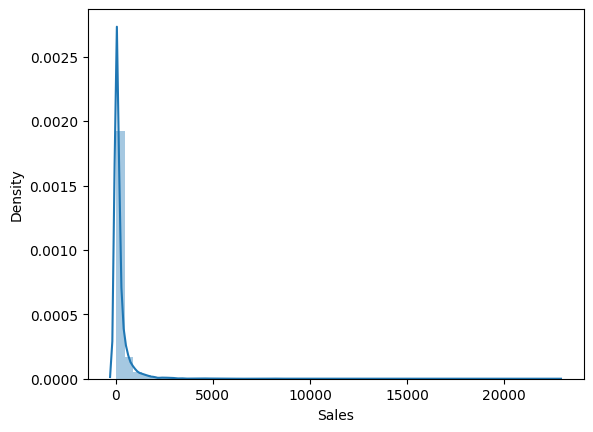

In [12]:
sns.distplot(df['Sales'])

the plot is realistic because from the sales number mean>median so it will be right skewd and the most of the data(75%) is less than 210

In [13]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [14]:
df.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

analyze the numbers

* 793 buying 5009 that means there is a customers that return to buy(customer loyalty)
* orders from 531 city, 49 state and one country
* 1862 product from 3 category and 17 sub-category


In [15]:
df.duplicated().sum()

1

In [16]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.describe(include=object)

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5967,37,37,5191,9993,915,2001,3203,19,6026,1523,48


# Exploratory data analysis

In [20]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
top_product = df.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False)
top_5 = top_product.head(5)
top_5

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

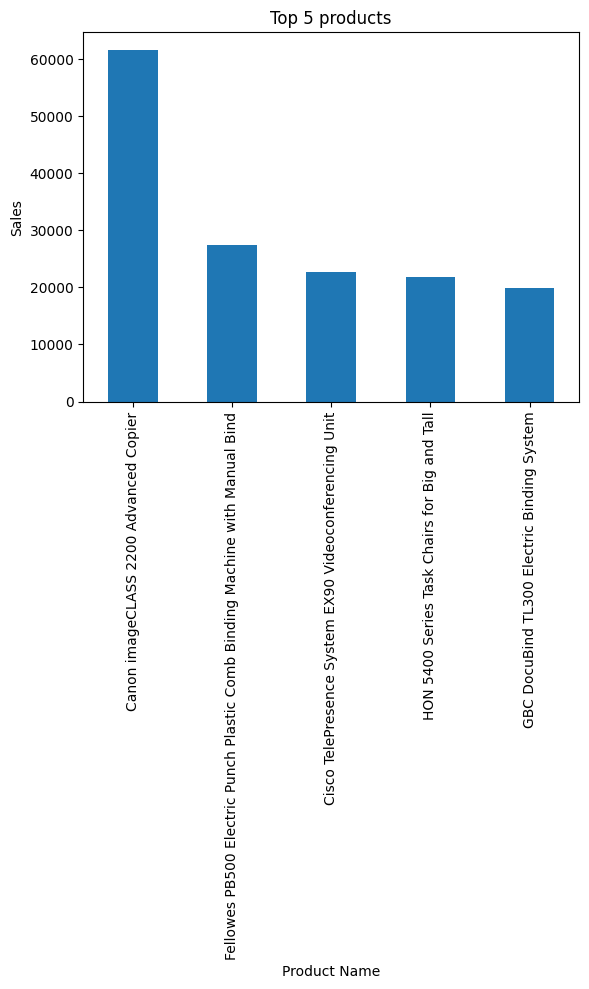

In [22]:
top_5.plot(kind='bar')
plt.title('Top 5 products')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()

Canon imageCLASS 2200 Advanced Copier is the **Best selling product** but what about its **profit**

In [23]:
top_profit = df.groupby(['Product Name'])['Profit'].sum().sort_values(ascending=False)
top_5_profit = top_profit.head(5)
top_5_profit

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

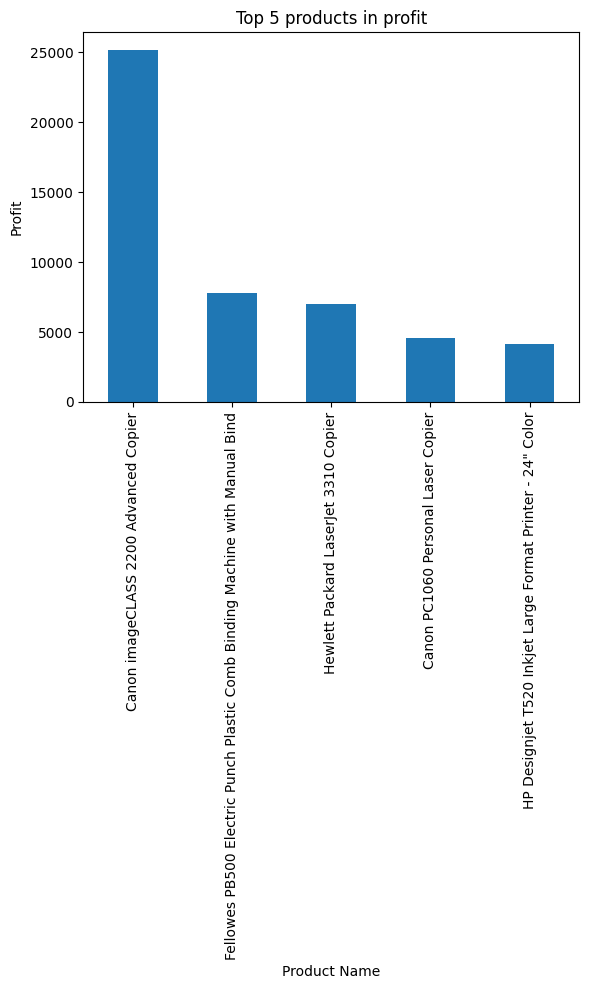

In [24]:
top_5_profit.plot(kind='bar')
plt.title('Top 5 products in profit')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.show()

The top 2 items in terms of profit are the same as the top 2 items in terms of sales

In [25]:
top_5.index == top_5_profit.index

array([ True,  True, False, False, False])

In [26]:
df.Region.value_counts()

Region
West       3203
East       2847
Central    2323
South      1620
Name: count, dtype: int64

- West is the region with the most purchases
- East & centeral very close to each other
- South is the least region

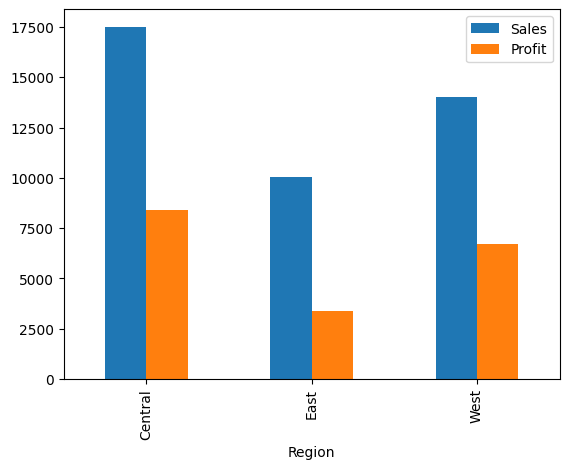

In [27]:
product = df[df['Product Name'] == 'Canon imageCLASS 2200 Advanced Copier']
region = product.groupby(['Region'])[['Sales','Profit']].mean()
region.plot(kind='bar')
plt.show()

- south doesn't appear so that mean there is no purchase for this specific product in south
- for the top 1 product the centeral has the most sales and profit

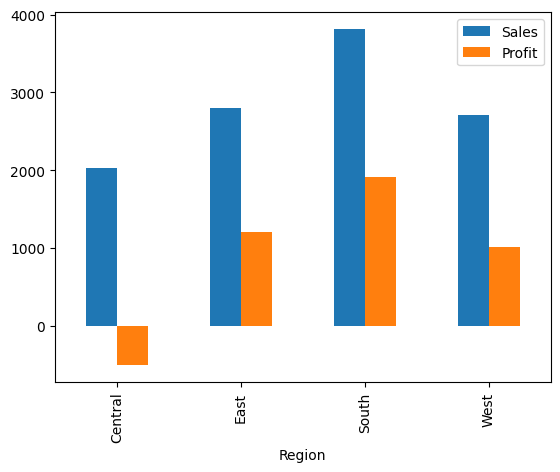

In [28]:
product_2 = df[df['Product Name'] == 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind']
region_2 = product_2.groupby(['Region'])[['Sales', 'Profit']].mean()
region_2.plot(kind = 'bar')
plt.show()

- There is a loss in the Central region (profit is negative)
- south has the most sales and profit for top 2 product

In [29]:
product_2 = df[(df['Product Name'] == 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind') & (df['Region'] == 'Central')]
product_2

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,CA-2017-152093,2017-09-10,2017-09-15,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,Illinois,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,CA-2015-120782,2015-04-28,2015-05-01,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,Michigan,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


- the item has been purchased 3 times 2 of them with 80% discount and loss in the profit
- loss happend because the big discount when the product is not viral in central

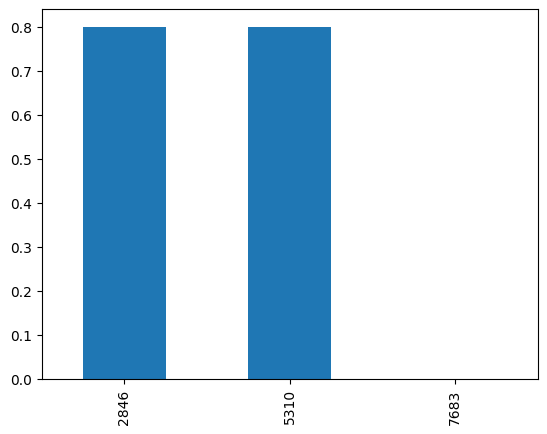

In [30]:
product_2['Discount'].plot(kind = 'bar')
plt.show()

In [31]:
# prompt: create data has only the numerical data in the df

numerical_data = df.select_dtypes(include=['number'])
numerical_data.head()


,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


In [32]:
monthly_sales = df.groupby('Order Date').agg({'Sales' : 'sum', 'Profit' : 'sum'}).reset_index()
monthly_sales = monthly_sales.set_index('Order Date')
monthly_sales = monthly_sales.resample('M').sum()
monthly_sales.head()

,Sales,Profit
Order Date,,
2014-01-31,14236.895,2450.1907
2014-02-28,4519.892,862.3084
2014-03-31,55691.009,498.7299
2014-04-30,28013.973,3500.8940
2014-05-31,23648.287,2738.7096


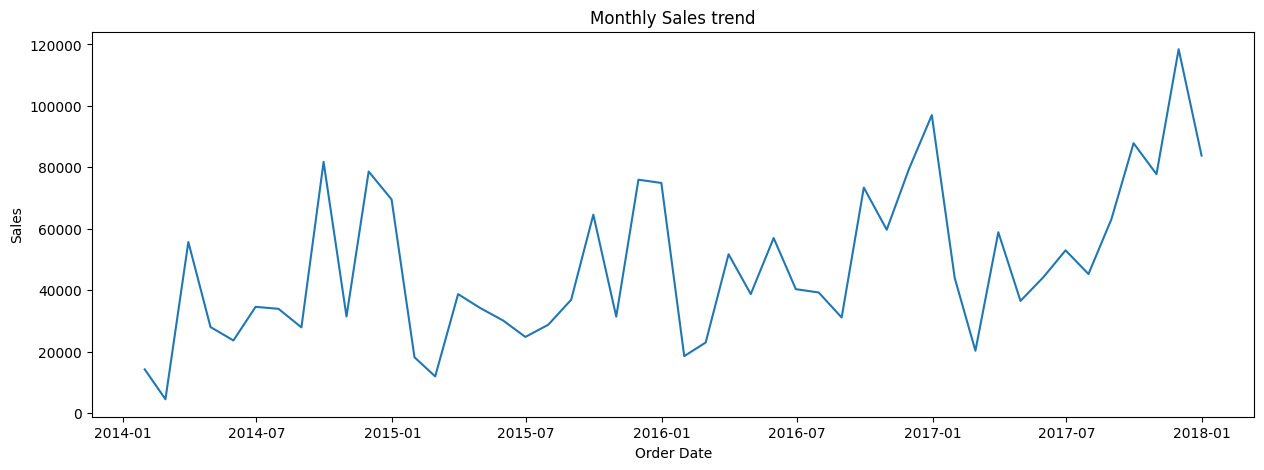

In [33]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['Sales'])
plt.title('Monthly Sales trend')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

the sales in up down state but overall the sales is increasing.

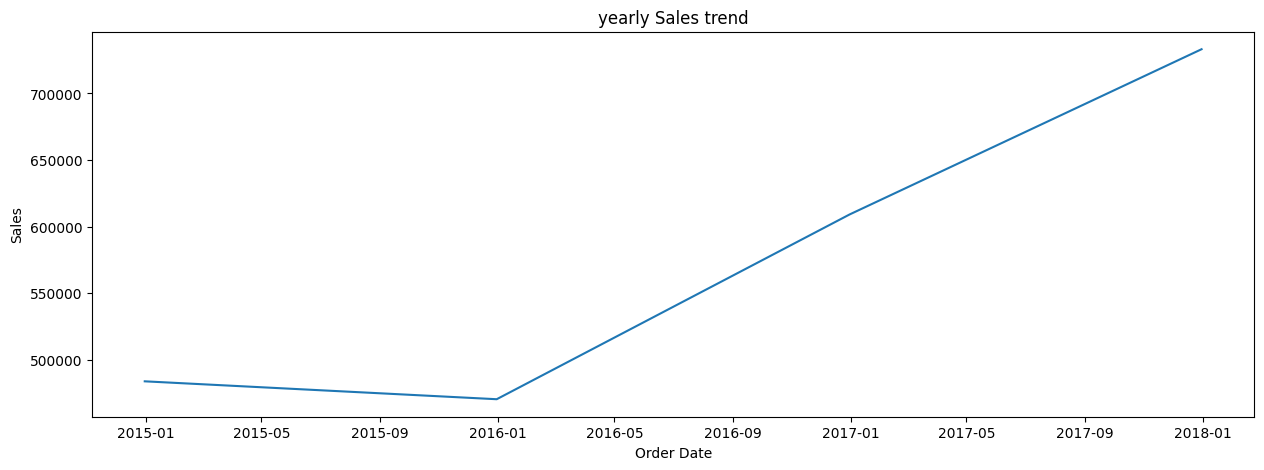

In [34]:
yearly_sales = monthly_sales.resample('Y').sum()
plt.figure(figsize=(15,5))
plt.plot(yearly_sales['Sales'])
plt.title('yearly Sales trend')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

the store is profitable but make sure with the profit column

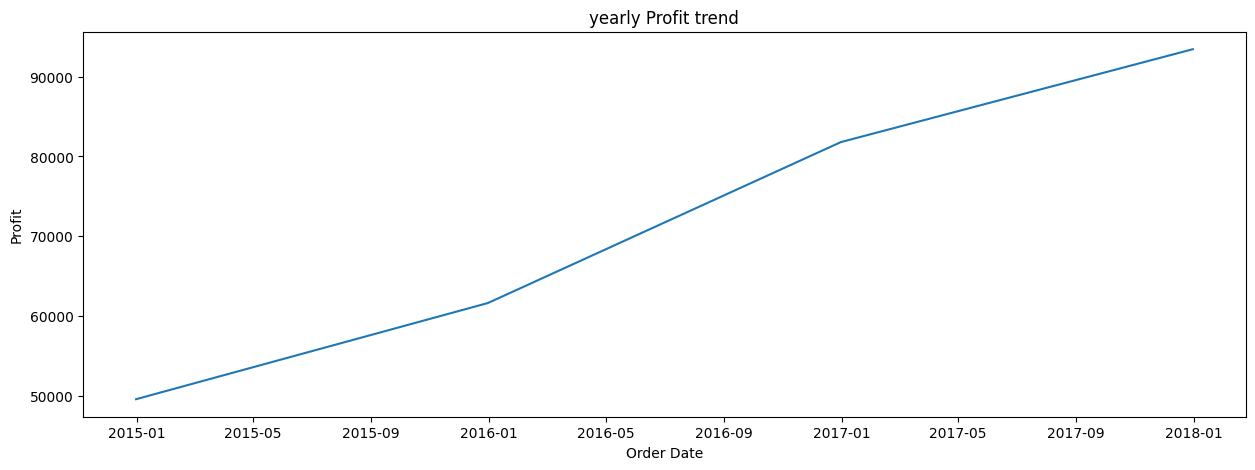

In [35]:
yearly_sales = monthly_sales.resample('Y').sum()
plt.figure(figsize=(15,5))
plt.plot(yearly_sales['Profit'])
plt.title('yearly Profit trend')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.show()

so now we surely knoe that there is increasing in the profit

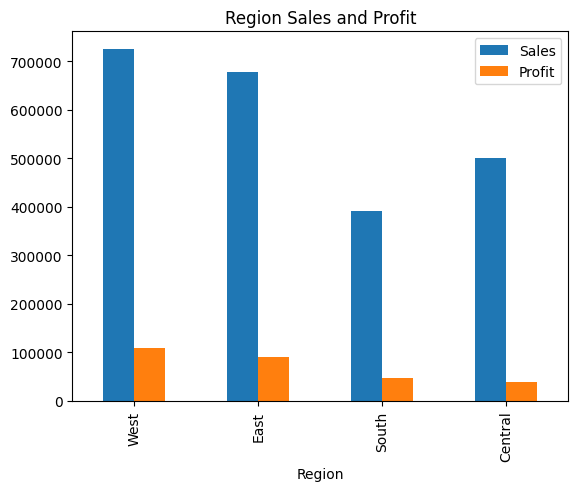

In [36]:
region = df.groupby('Region')[['Sales','Profit']].sum().sort_values(ascending=False, by='Profit')
region.plot(kind='bar')
plt.title('Region Sales and Profit')
plt.xlabel('Region')
plt.show()

- sales for the west and east is the most the same with the profit
- the south is less in sales than central but more in the profit

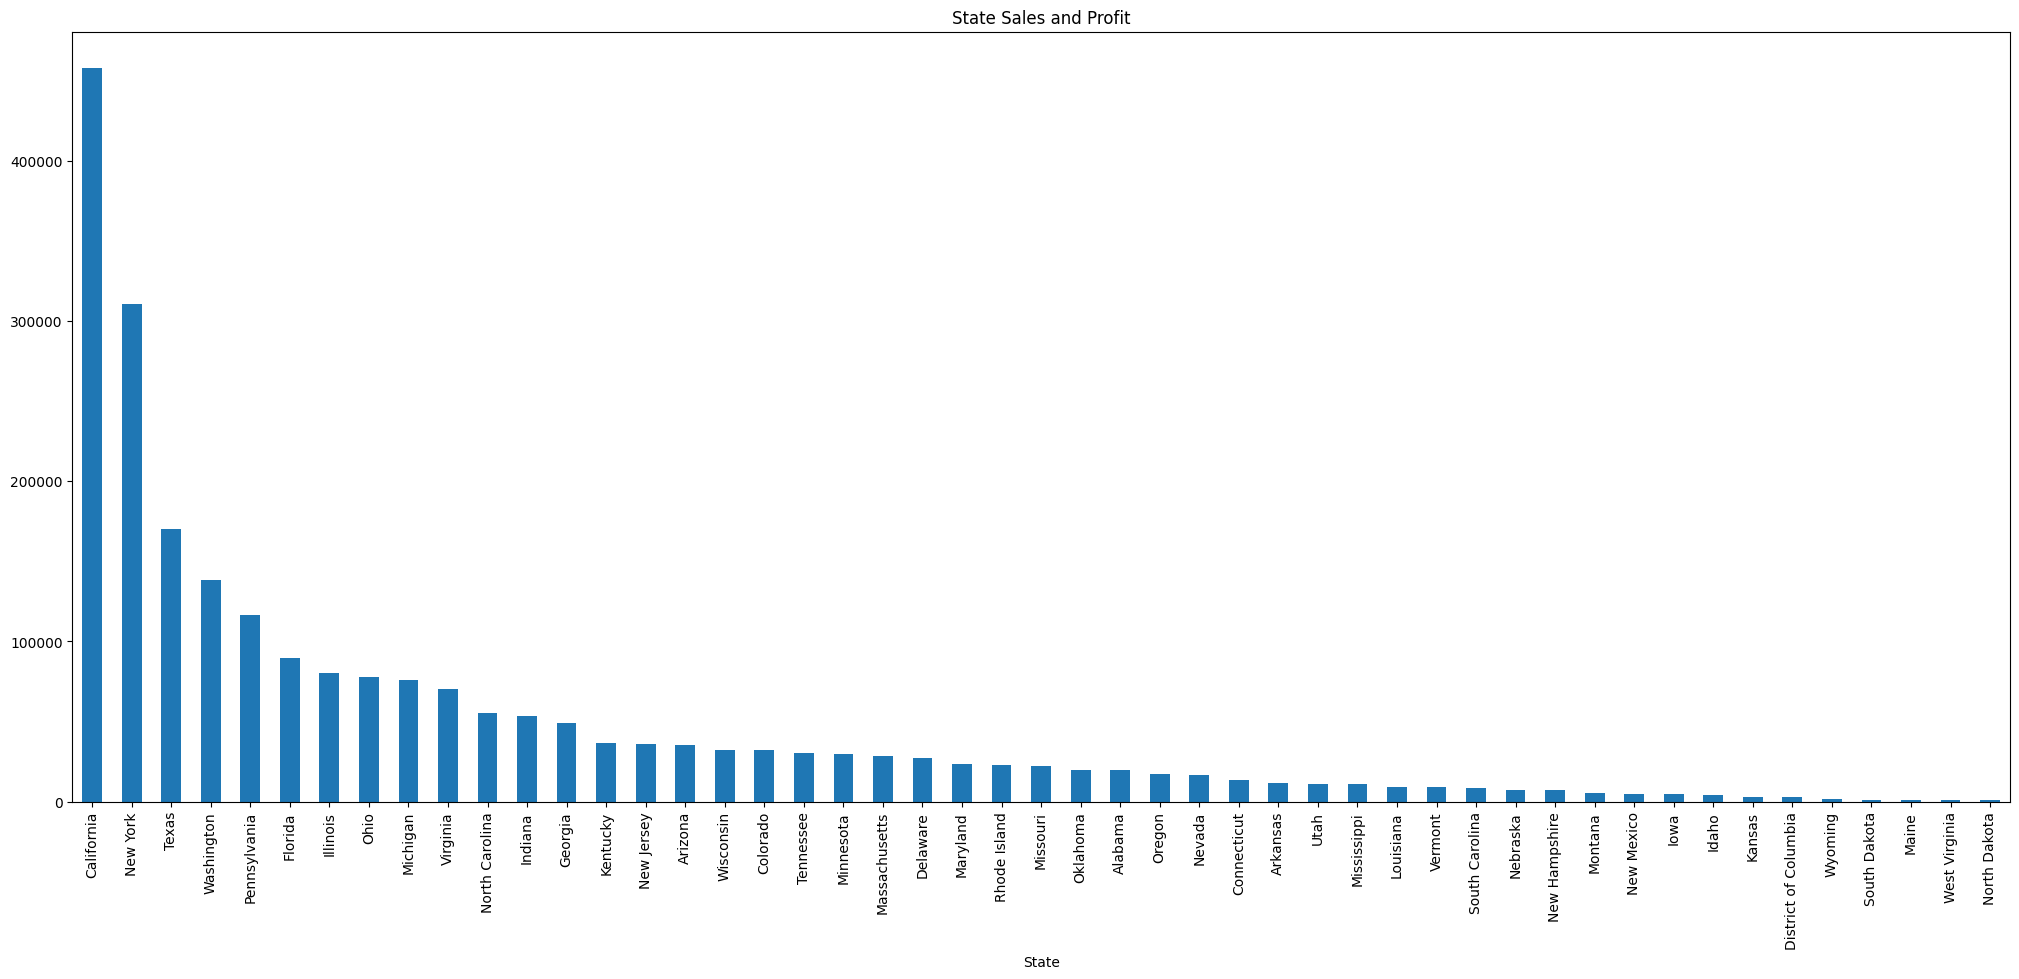

In [37]:
state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(25,10))
state.plot(kind='bar', ax=ax)
plt.title('State Sales and Profit')
plt.xlabel('State')
plt.show()

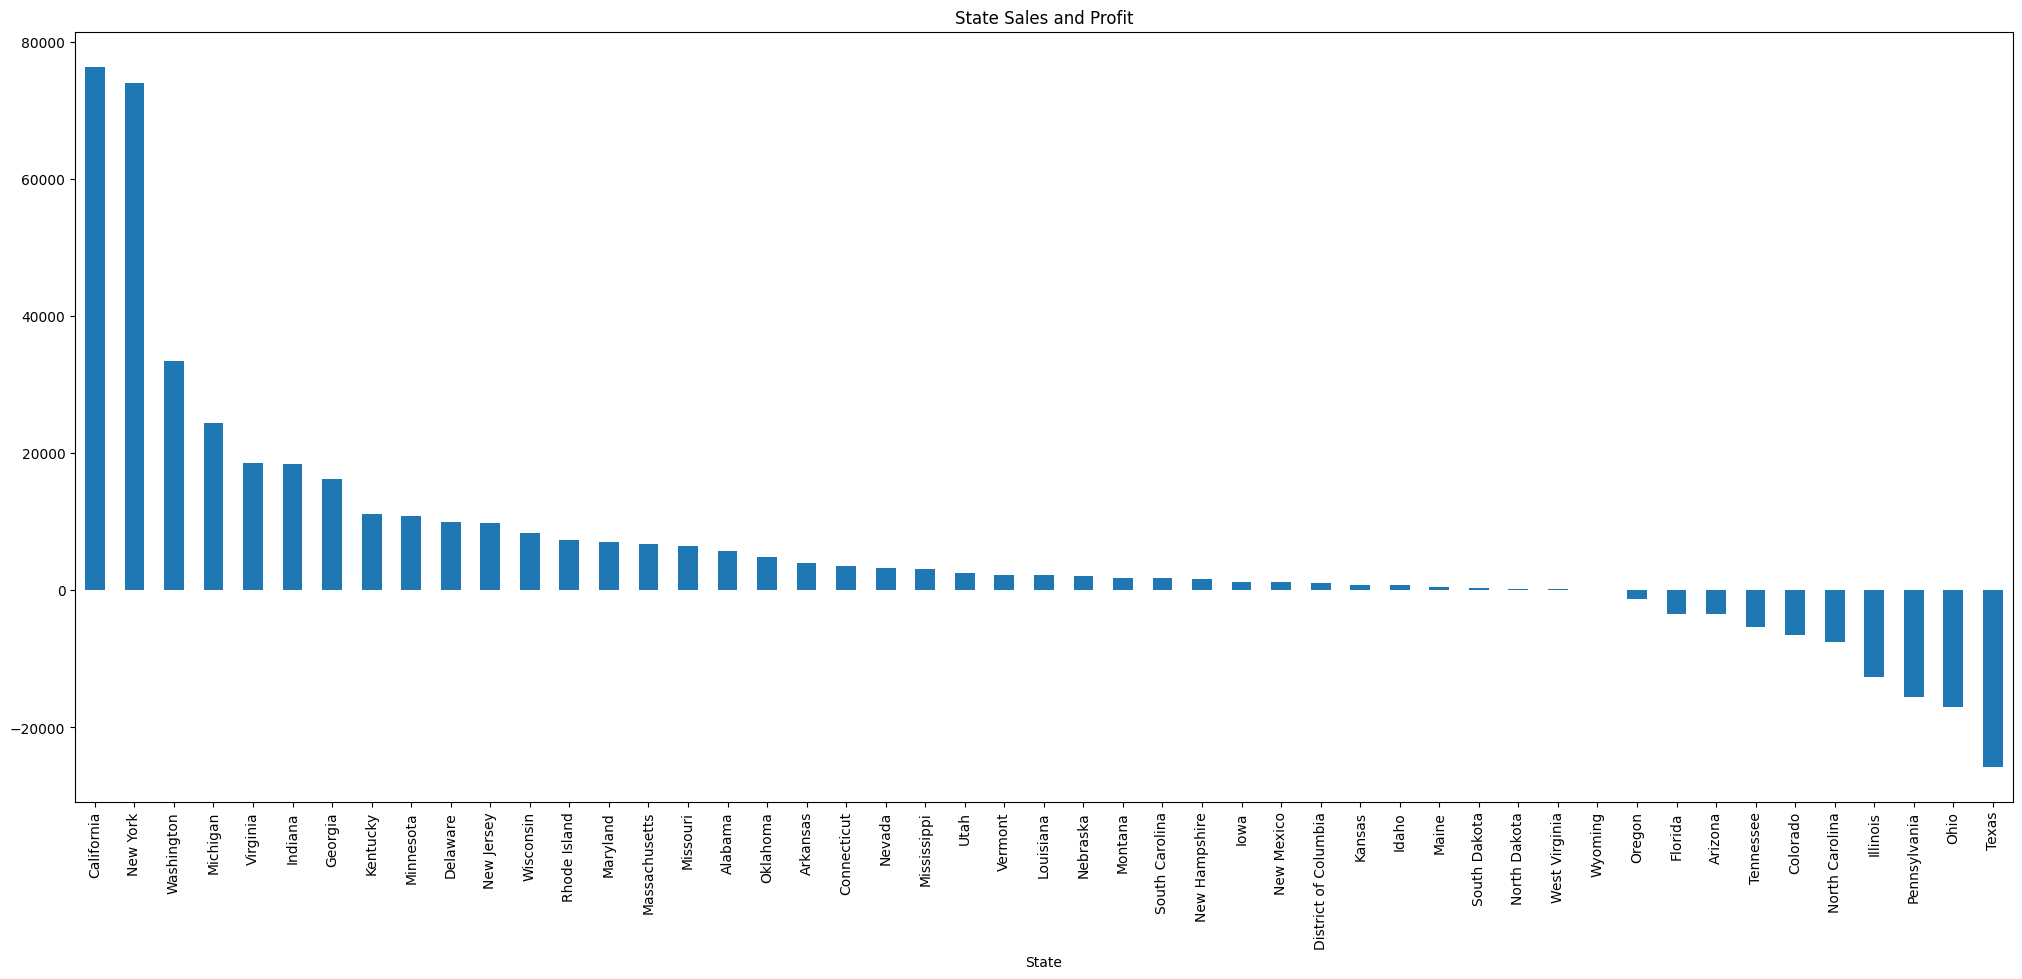

In [38]:
state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(25,10))
state.plot(kind='bar', ax=ax)
plt.title('State Sales and Profit')
plt.xlabel('State')
plt.show()

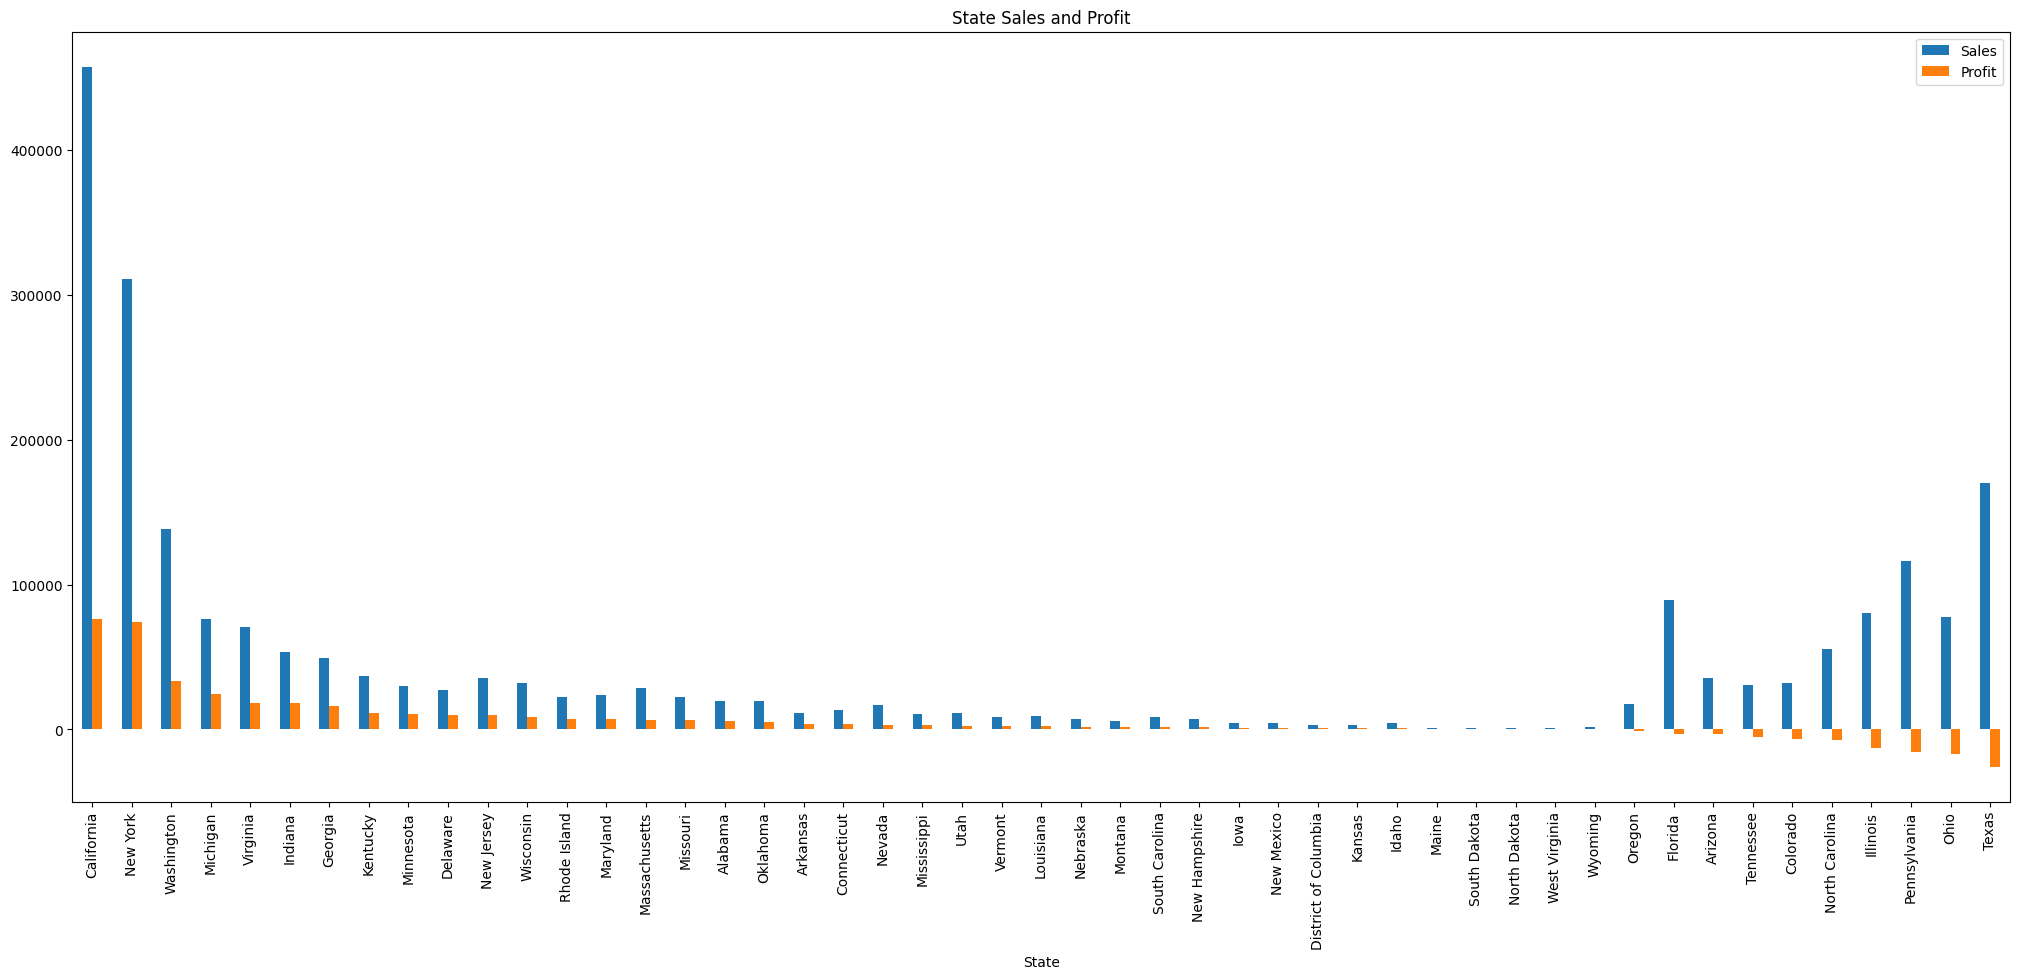

In [39]:
state = df.groupby('State')[['Sales','Profit']].sum().sort_values(ascending=False, by='Profit')
fig, ax = plt.subplots(figsize=(25,10))
state.plot(kind='bar', ax=ax)
plt.title('State Sales and Profit')
plt.xlabel('State')
plt.show()

- cali is the most selling/profitable state
- there is states that has kinda good sales but no profit(loss) : texas, ohio, pennsylyvania....

<Axes: xlabel='City'>

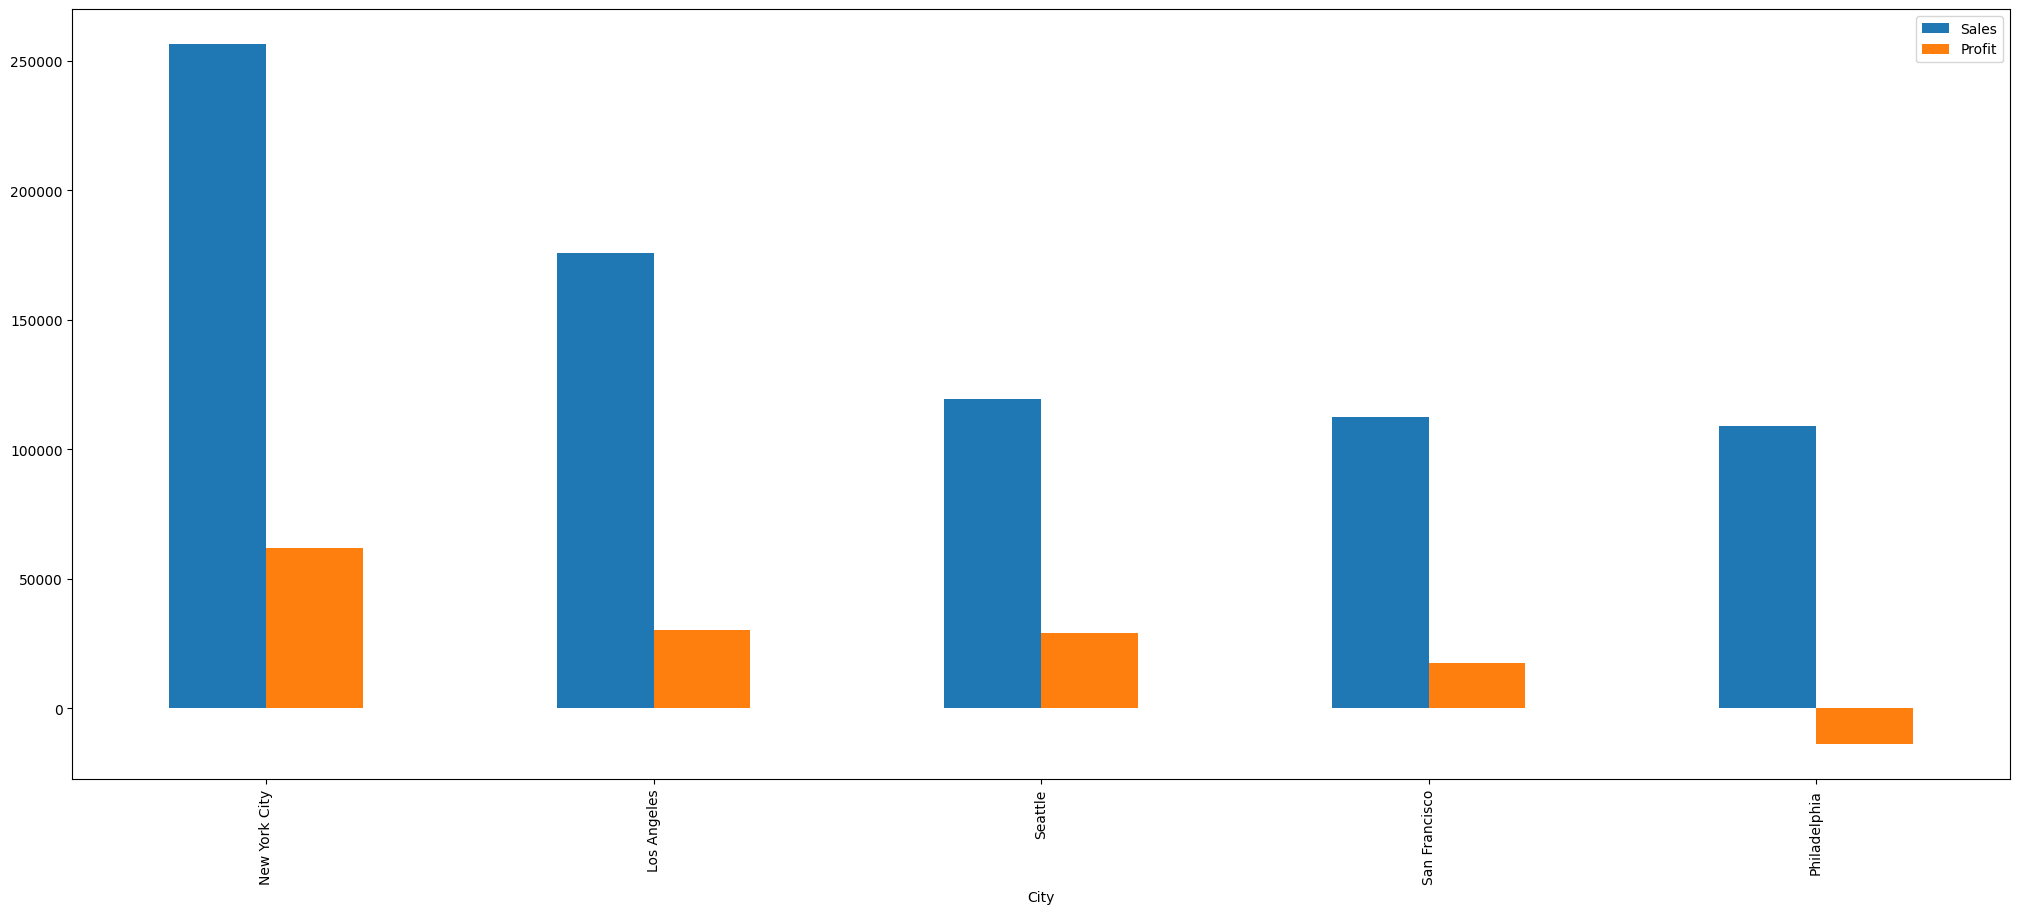

In [40]:
city = df.groupby('City')[['Sales','Profit']].sum().sort_values(ascending=False, by='Sales')
fig, ax = plt.subplots(figsize=(25,10))
city.head().plot(kind='bar', ax=ax)

even though philadelphia is the 5 in the best selling but there is loss so we will try to analyze discounts to know if it the cause of the loss or no

In [41]:
df.Discount.value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

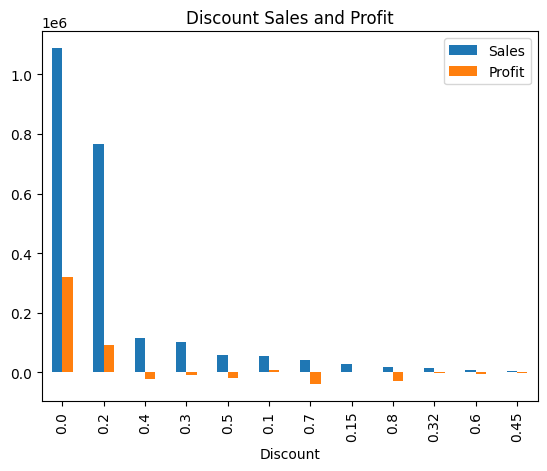

In [42]:
discount = df.groupby(df.Discount)[['Sales','Profit']].sum().sort_values(ascending=False, by='Sales')
discount.plot(kind='bar')
plt.title('Discount Sales and Profit')
plt.xlabel('Discount')
plt.show()

now we can know that any discounts except 20% will cause loss to the store

In [45]:
cat = df.groupby('Category')[['Sales','Profit']].sum().sort_values(ascending=False, by='Profit')
cat.head()

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Office Supplies,719047.0320,122490.8008
Furniture,741718.4233,18463.3316


the Technology is the 1 in sales and profit

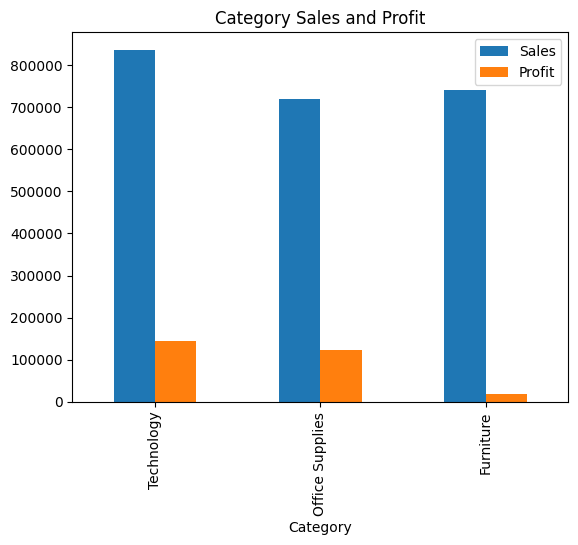

In [46]:
cat.plot(kind='bar')
plt.title('Category Sales and Profit')
plt.xlabel('Category')
plt.show()

In [56]:
ship = df['Ship Mode'].value_counts()
ship

Ship Mode
Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

the preferable mode is standard the least favorite same day

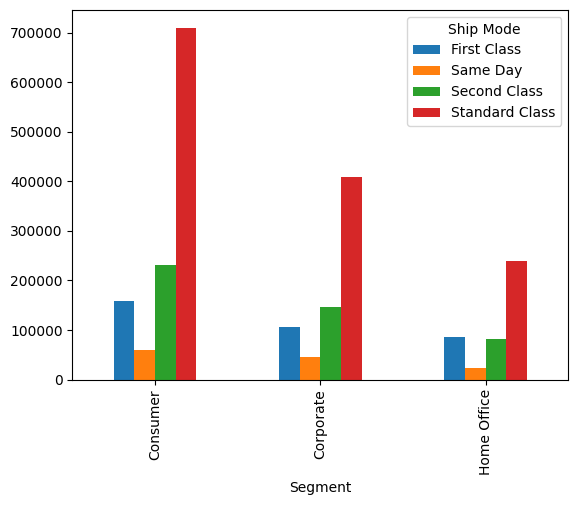

In [59]:
customer = df.pivot_table(index='Segment', columns='Ship Mode', values='Sales', aggfunc='sum')
customer.plot(kind='bar')
plt.show()

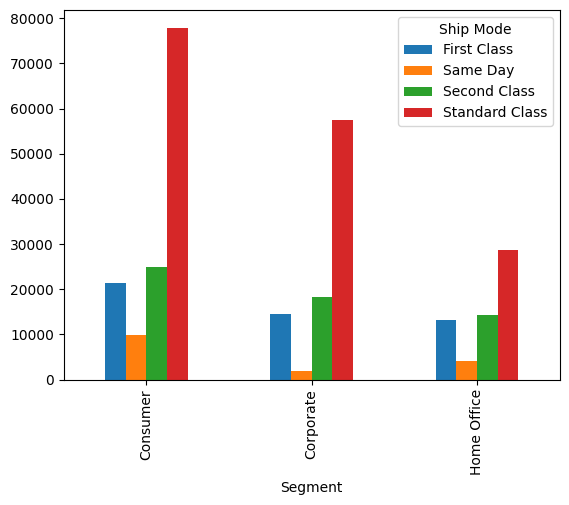

In [63]:
customer = df.pivot_table(index='Segment', columns='Ship Mode', values='Profit', aggfunc='sum')
customer.plot(kind='bar')
plt.show()

consumer using standard class is the top 1 in sales and profit